# Project: Diabetes Onset Classification  
**Objective:**  
Build a binary classifier to predict whether a patient has diabetes, using the Pima Indians Diabetes dataset.  

**Notebook 01: Data Loading & Exploratory Data Analysis (EDA)**

In [1]:
# ─── 1. Imports ───────────────────────────────────────────────────────────────────
import pandas as pd
import numpy as np

# (For plotting during EDA)
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [2]:
data_path = "data/raw/diabetes[1].csv"
df = pd.read_csv(data_path)

# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Exploratory Data Analysis (EDA)

In [3]:
# 3.1 Shape & Data Types
print("Number of rows and columns:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

# 3.1.1 Basic Descriptive Statistics
df.describe()

Number of rows and columns: (768, 9)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3.2 Identify Zero-Value Anomalies

In [4]:
# Columns where 0 means “missing” rather than a valid value
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("Count of zeros (likely missing) per column:")
for col in zero_cols:
    num_zero = (df[col] == 0).sum()
    pct_zero = num_zero / df.shape[0] * 100
    print(f"  • {col}: {num_zero} zeros  ({pct_zero:.1f}%)")

Count of zeros (likely missing) per column:
  • Glucose: 5 zeros  (0.7%)
  • BloodPressure: 35 zeros  (4.6%)
  • SkinThickness: 227 zeros  (29.6%)
  • Insulin: 374 zeros  (48.7%)
  • BMI: 11 zeros  (1.4%)


### 3.3 Target Class Balance

Outcome
0    500
1    268
Name: count, dtype: int64


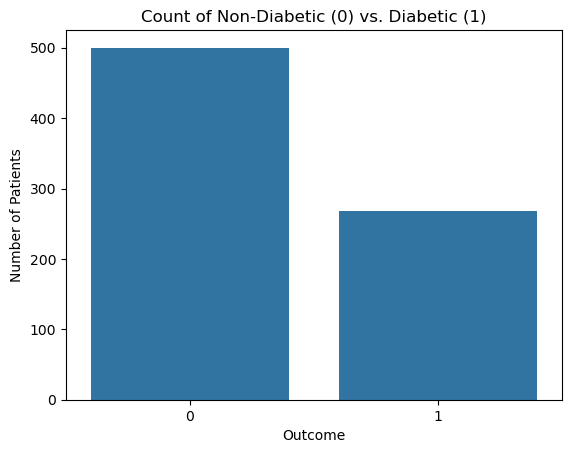

In [5]:
# Count of each class
class_counts = df["Outcome"].value_counts()
print(class_counts)

# Visualize using a countplot
sns.countplot(x="Outcome", data=df)
plt.title("Count of Non-Diabetic (0) vs. Diabetic (1)")
plt.xlabel("Outcome")
plt.ylabel("Number of Patients")
plt.show()

### 3.4 Feature Distributions
Visualize distributions of Glucose, BMI, and Age.

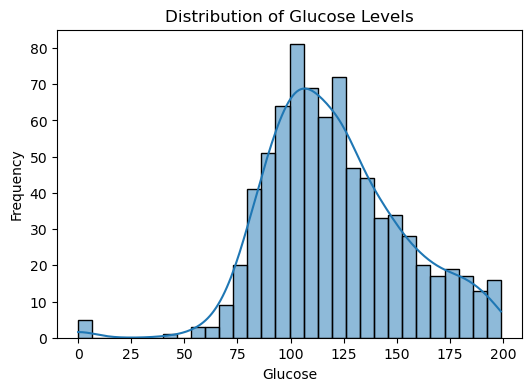

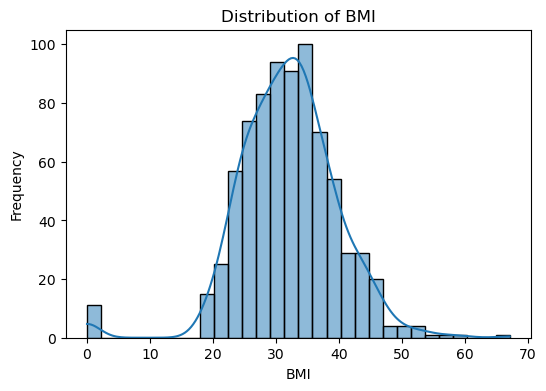

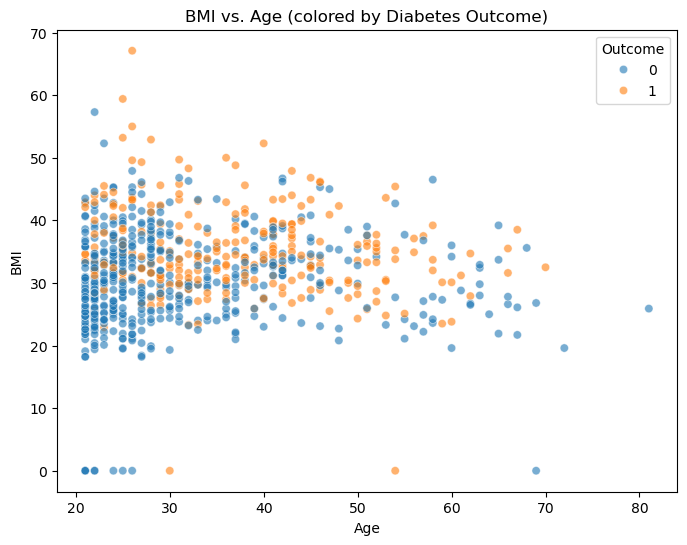

In [6]:
# 3.4.1 Distribution of Glucose Levels
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Glucose", bins=30, kde=True)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

# 3.4.2 Distribution of BMI
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="BMI", bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# 3.4.3 Age vs. BMI Scatter Plot (colored by Outcome)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="BMI", hue="Outcome", data=df, alpha=0.6)
plt.title("BMI vs. Age (colored by Diabetes Outcome)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Outcome")
plt.show()

## 4. Data PreProccessing
**4.1 Imputation Strategy**
Based on the zero-value counts, we will replace zeros with the median of the respective column.

In [7]:
# Collums where 0 means missing data
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Do the median imputation
for col in zero_cols:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

# Check to see that no 0's are left in those collums
print("Post-imputation zero counts:")
for col in zero_cols:
    print(f"  • {col}: {(df[col] == 0).sum()} zeros")

Post-imputation zero counts:
  • Glucose: 0 zeros
  • BloodPressure: 0 zeros
  • SkinThickness: 0 zeros
  • Insulin: 0 zeros
  • BMI: 0 zeros


**4.2 Feature Scaling**  
Standardize continuous features to mean 0 and unit variance using `StandardScaler`.

In [8]:
from sklearn.preprocessing import StandardScaler

# Identify feature columns (all of them execept 'Outcome')
feature_cols = df.columns.drop('Outcome')

# Intialize the scaler and transform the data
scalar = StandardScaler()

# Quick check
print(df[feature_cols].mean().round(2))
print(df[feature_cols].std().round(2))


Pregnancies                   3.85
Glucose                     121.66
BloodPressure                72.39
SkinThickness                27.33
Insulin                      94.65
BMI                          32.45
DiabetesPedigreeFunction      0.47
Age                          33.24
dtype: float64
Pregnancies                   3.37
Glucose                      30.44
BloodPressure                12.10
SkinThickness                 9.23
Insulin                     105.55
BMI                           6.88
DiabetesPedigreeFunction      0.33
Age                          11.76
dtype: float64


**4.3 Traning Data vs Test Data Split**

Split 80% of the data into training and 20% into test data

In [9]:
from sklearn.model_selection import train_test_split

# Seperate the features from the outcome
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

# Do the 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

print("Training set:", X_train.shape, y_train.value_counts(normalize=True).round(2))
print("Test set:    ", X_test.shape,  y_test.value_counts(normalize=True).round(2))

Training set: (614, 8) Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64
Test set:     (154, 8) Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64


## 5. Model Training and Comparison
**5.1 Pipleline Setup**

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state = 42))
])

**5.2 Baseline Training and Evaluation**

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Fit
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Evaluate
print(f"Accuracy:           {acc:.3f}")
print(f"ROC AUC:            {auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy:           0.760
ROC AUC:            0.820

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



**5.3 Hyperparameter Tuning**

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "clf__n_estimators": [100,200],
    "clf__max_depth": [None, 5, 10],
    "clf__min_samples_split": [2, 5]
}

grid = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = 5,
    scoring = "roc_auc",
    n_jobs = 1
)

grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Best CV AUC: ", grid.best_score_.round(3))

Best parameters:  {'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best CV AUC:  0.837


**5.4 Final Test Evaluation**

In [13]:
best_pipeline = grid.best_estimator_

y_pred_final = best_pipeline.predict(X_test)
y_proba_final = best_pipeline.predict_proba(X_test)[:,1]

acc_final = accuracy_score(y_test, y_pred_final)
auc_final = roc_auc_score(y_test, y_proba_final)

print(f"Test Accuracy:       {acc_final:.3f}")
print(f"Test ROC AUC Score:  {auc_final:.3f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

Test Accuracy:       0.734
Test ROC AUC Score:  0.812

Final Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



**5.5 Feature Importance**

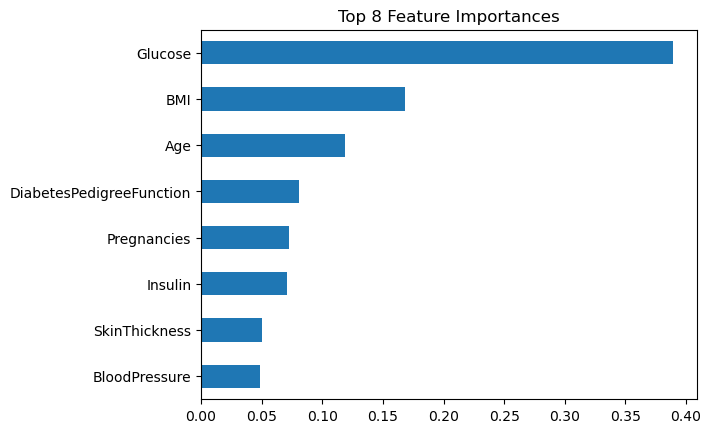

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_pipeline.named_steps["clf"].feature_importances_
feat_imp   = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Plot top 8
feat_imp.head(8).plot(kind="barh")
plt.title("Top 8 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

## 6. Variability & Uncertainty Analysis
Asses how stable the model's ROC-AUC is by repeating the training/testing split multiple times

### 6.1 Parameters & Storage
Stating how many repetitions to run and prepare a place to collect AUC scores

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

N = 30                # number of random splits
auc_scores = []       # list to store each split's AUC

### 6.2 Repeated Train/Test Splits
For each seed, split the data, fit the pipeline and record the results

In [17]:
for seed in range(N):
    # Create a new stratified split
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y,
        test_size = 0.2,
        stratify = y,
        random_state = seed
    )
# Fit the best pipeline from GridSearchCV
best_pipeline.fit(X_tr, y_tr)

# Predict probabilities and calculate AUC
y_prob = best_pipeline.predict_proba(X_te)[:, 1]
auc_scores.append(roc_auc_score(y_te, y_prob))

### 6.3 Summary Statisitics
Compute the mean and standard deviation of the AUC scores to see variability

In [18]:
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f"Mean ROC‑AUC over {N} runs: {mean_auc:.3f} ± {std_auc:.3f}")

Mean ROC‑AUC over 30 runs: 0.856 ± 0.000


### 6.4 Visualize AUC Distribution
Make a histogram of the AUC scores and show the mean

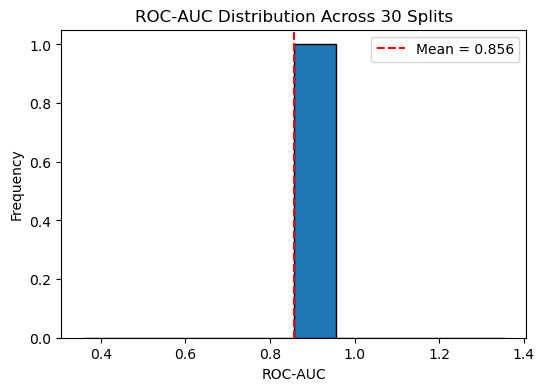

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(auc_scores, bins=10, edgecolor='k')
plt.axvline(mean_auc, color='r', linestyle='--', label=f"Mean = {mean_auc:.3f}")
plt.title(f"ROC‑AUC Distribution Across {N} Splits")
plt.xlabel("ROC‑AUC")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## 7. Model Serialization
Saving the final pipeline so that it can be uses later without retraining

In [22]:
import joblib

# 'best_pipeline' is the tuned + finalized scikit‑learn Pipeline
model_filename = "diabetes_rf_pipeline.pkl"
joblib.dump(best_pipeline, model_filename)

print(f"Saved model pipeline to: {model_filename}")

Saved model pipeline to: diabetes_rf_pipeline.pkl
